# Stochastic Hedging Simulations: Black-Scholes Framework

## General Context

In financial mathematics, the Black-Scholes model provides a framework for pricing and hedging derivative securities, such as European call options. A key assumption in the classic Black-Scholes model is constant volatility. However, in real-world financial markets, volatility often exhibits stochastic behavior, which leads to more realistic models that incorporate stochastic volatility.

In this project, we study the profit and loss (P&L) of hedging strategies for a European call option under a Black-Scholes framework with stochastic volatility. The option's payoff at maturity $ T $ is given by:

$$
(S_T - K)^+ = \max(S_T - K, 0),
$$

where $ S_T $ is the underlying asset price at maturity, and $ K $ is the strike price.

To hedge the option, we use the Black-Scholes delta hedging strategy with volatility $ \Sigma $. The P&L from this strategy at maturity is defined as:

$$
\text{PL}_T(\Sigma) = X_T^{\Delta_\text{BS}} - (S_T - K)^+,
$$

where $ X_T^{\Delta_\text{BS}} $ is the final value of the hedging portfolio, and $ \Delta_\text{BS}(t) $ is the Black-Scholes delta:

$$
\Delta_\text{BS}(t) = N(d^+(S_t, K e^{-r(T-t)}, \Sigma^2(T-t))),
$$

with $ N $ denoting the cumulative distribution function of the standard normal distribution, and:

$$
d^+(s, k, v) = \frac{\ln(s/k) + \frac{1}{2}v}{\sqrt{v}},
$$
$$
v = \Sigma^2(T-t).
$$

The dynamics of the underlying asset price $ S_t $ are modeled as:

$$
S_t = S_0 \exp\left(-\frac{1}{2}\int_0^t \sigma_u^2 \, du + \int_0^t \sigma_u \, dW_u^1\right),
$$

where $ \sigma_t $ represents the stochastic volatility, which follows an Ornstein-Uhlenbeck process:

$$
d\sigma_t = -\lambda(\sigma_t - c) \, dt + \gamma \, dW_t^2,
$$

and $ W^1 $ and $ W^2 $ are independent Brownian motions.

Under these assumptions, the P&L at maturity can also be expressed as:

$$
\text{PL}_T(\Sigma) = \frac{1}{2} \int_0^T e^{T-u} \left(\Sigma^2 - \sigma_u^2\right) S_u^2 \Gamma_\text{BS}(u, S_u, \Sigma) \, du,
$$

where $ \Gamma_\text{BS} $ is the second derivative of the Black-Scholes price with respect to $ S $.

This project focuses on simulating the stochastic processes $ \sigma_t $ and $ S_t $, as well as calculating and analyzing the empirical distribution of $ \text{PL}_T(\Sigma) $ under various conditions.

## Objective
This project simulates:
- The stochastic volatility process $ \sigma_t $ over time.
- The asset price trajectories $ S_t $ influenced by stochastic volatility.
- Profit and loss distributions $ \text{PL}_T(\Sigma) $ for a Black-Scholes hedging strategy.

We aim to explore the statistical properties of these distributions and assess the impact of varying strike prices $ K $.

## Methodology
1. **Simulation of Stochastic Volatility**: The volatility $ \sigma_t $ is modeled as an Ornstein-Uhlenbeck process, solved explicitly, and simulated using discrete approximations.
2. **Simulation of Asset Price Dynamics**: Asset price trajectories are generated under the influence of stochastic volatility.
3. **Profit and Loss Analysis**: Using Monte Carlo simulations, we calculate the profit and loss distributions for hedging strategies and analyze their statistical characteristics.

## Results
The project provides insights into the behavior of stochastic volatility, its influence on asset price trajectories, and the resulting impact on the efficiency of hedging strategies.


---

# 1. Stochastic Volatility Simulation

To model the stochastic volatility $ \sigma_t $, we use an Ornstein-Uhlenbeck process governed by the stochastic differential equation (SDE):

$$
d\sigma_t = -\lambda (\sigma_t - c) \, dt + \gamma \, dW_t,
$$

where:
- $ \lambda > 0 $: the mean reversion rate,
- $ c > 0 $: the long-term mean of the process,
- $ \gamma > 0 $: the volatility of the process,
- $ W_t $: a standard Brownian motion.

### 1.1. Derivation of the Explicit Formula for $ \sigma_t $

To derive the explicit solution for $ \sigma_t $, we define a new process:

$$
Y_t = e^{\lambda t} \sigma_t.
$$

Applying Itô's lemma to $ Y_t $, we compute:

$$
dY_t = \frac{\partial Y_t}{\partial t} \, dt + \frac{\partial Y_t}{\partial \sigma_t} \, d\sigma_t + \frac{1}{2} \frac{\partial^2 Y_t}{\partial \sigma_t^2} \, (d\sigma_t)^2.
$$

Since $ Y_t = e^{\lambda t} \sigma_t $, we have:
- $ \frac{\partial Y_t}{\partial t} = \lambda e^{\lambda t} \sigma_t $,
- $ \frac{\partial Y_t}{\partial \sigma_t} = e^{\lambda t} $,
- $ \frac{\partial^2 Y_t}{\partial \sigma_t^2} = 0 $.

Substituting these into the formula for $ dY_t $, we get:

$$
dY_t = \lambda e^{\lambda t} \sigma_t \, dt + e^{\lambda t} \, d\sigma_t.
$$

Now, replacing $ d\sigma_t $ with its expression from the initial SDE:

$$
dY_t = \lambda e^{\lambda t} \sigma_t \, dt + e^{\lambda t} \left(-\lambda (\sigma_t - c) \, dt + \gamma \, dW_t \right).
$$

Expanding this:

$$
dY_t = \lambda e^{\lambda t} \sigma_t \, dt - \lambda e^{\lambda t} \sigma_t \, dt + \lambda c e^{\lambda t} \, dt + \gamma e^{\lambda t} \, dW_t.
$$

The first two terms cancel out, leaving:

$$
dY_t = \lambda c e^{\lambda t} \, dt + \gamma e^{\lambda t} \, dW_t.
$$

Integrating both sides from $ 0 $ to $ t $:

$$
Y_t = Y_0 + \int_0^t \lambda c e^{\lambda s} \, ds + \int_0^t \gamma e^{\lambda s} \, dW_s.
$$

Since $ Y_t = e^{\lambda t} \sigma_t $ and $ Y_0 = \sigma_0 $, this becomes:

$$
\sigma_t e^{\lambda t} = \sigma_0 + \int_0^t \lambda c e^{\lambda s} \, ds + \int_0^t \gamma e^{\lambda s} \, dW_s.
$$

#### 1.2. Deterministic Integral Calculation

The deterministic integral is:

$$
\int_0^t \lambda c e^{\lambda s} \, ds = c \left( e^{\lambda t} - 1 \right).
$$

Substituting this back:

$$
\sigma_t e^{\lambda t} = \sigma_0 + c \left( e^{\lambda t} - 1 \right) + \int_0^t \gamma e^{\lambda s} \, dW_s.
$$

Dividing through by $ e^{\lambda t} $, we isolate $ \sigma_t $:

$$
\sigma_t = c + (\sigma_0 - c) e^{-\lambda t} + \gamma \int_0^t e^{-\lambda (t - s)} \, dW_s.
$$

### 1.3. Numerical Simulation of $ \sigma_t $ and Brownian Motion

To simulate $ \sigma_t $, we discretize the time interval $ [0, T] $ into $ n $ regular steps with $ \Delta t = \frac{T}{n} $. Using the derived explicit solution, $ \sigma_{t_{i+1}} $ can be approximated as:

$$
\sigma_{t_{i+1}} = c + (\sigma_0 - c) e^{-\lambda t_{i+1}} + \gamma \sum_{j=0}^i e^{-\lambda (t_{i+1} - t_j)} \Delta W_j,
$$

where:
- $ \Delta W_j = \sqrt{\Delta t} \, Z_j $,
- $ Z_j \sim \mathcal{N}(0, 1) $ are independent standard normal random variables.

Each $ \Delta W_j $ represents the increment of the Brownian motion over the time interval $ [t_j, t_{j+1}] $.

The following Python code implements this simulation using these discretized dynamics to generate multiple trajectories of $ \sigma_t $.


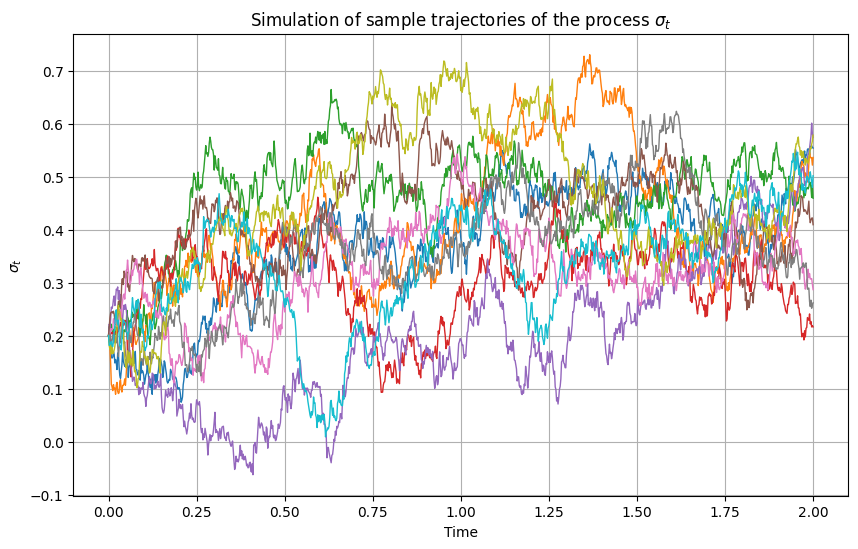

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
T = 2.0           # Total time
n = 1000          # Number of time steps
dt = T / n        # Time step size
m = 1000          # Number of trajectories to simulate

# Parameters of the OU process
sigma0 = 0.2      # Initial value of sigma
lambda_ = 2.0     # Rate of mean reversion
c = 0.4           # Long-term mean level
gamma = 0.3       # Volatility of the process

t = np.linspace(0, T, n + 1)

sigma = np.zeros((m, n + 1))
sigma[:, 0] = sigma0

for i in range(1, n + 1):
    dW = np.sqrt(dt) * np.random.randn(m)
    sigma[:, i] = sigma[:, i - 1] + lambda_ * (c - sigma[:, i - 1]) * dt + gamma * dW

plt.figure(figsize=(10, 6))
for j in range(10):  # Display the first 10 trajectories
    plt.plot(t, sigma[j], lw=1)
plt.title('Simulation of sample trajectories of the process $\\sigma_t$')
plt.xlabel('Time')
plt.ylabel('$\\sigma_t$')
plt.grid(True)
plt.show()


The simulated trajectories of the OU process $ \sigma_t $ exhibit a general tendency to revert to the mean $ c = 0.4 $.

The trajectories fluctuate around this value, with variations driven by the volatility component $ \gamma $, resulting in random oscillations.

Although each trajectory is unique, they remain broadly confined within a band around the mean, reflecting the stabilizing effect of the parameter $ \lambda $. Furthermore, $ \sigma_t $ is not constrained by a fixed boundary: some trajectories may approach zero or exceed 0.8, but the majority oscillates around the mean value.


# 2. Asset Price Simulation

To simulate the process $S_t$, we use the exponential formula for the price of a risky asset given in the problem statement:

$$
S_t := S_0 \exp \left( -\frac{1}{2} \int_0^t \sigma_u^2 \, du + \int_0^t \sigma_u \, dW_u^1 \right),
$$

where:
- $S_0$ is the initial asset price,
- $\sigma_t$ is a stochastic process described by an Ornstein-Uhlenbeck equation.

Since exact simulation of the continuous process is not feasible, we use a discretized version by replacing the integrals with discrete sums. The discrete approximation for $S_{t_{i+1}}$ is:

$$
S_{t_{i+1}} = S_{t_i} \exp \left( -\frac{1}{2} \sigma_{t_i}^2 \Delta t + \sigma_{t_i} \Delta W_i \right),
$$

where:
- $\Delta t$ is the time step size,
- $\Delta W_i \sim \mathcal{N}(0, \Delta t)$ is a Brownian increment between $t_i$ and $t_{i+1}$.

This approach allows us to simulate the evolution of $S_t$ over a discretized time grid, capturing the stochastic behavior of the asset price influenced by the volatility $\sigma_t$. The results are visualized to study the trajectories and their dynamics.


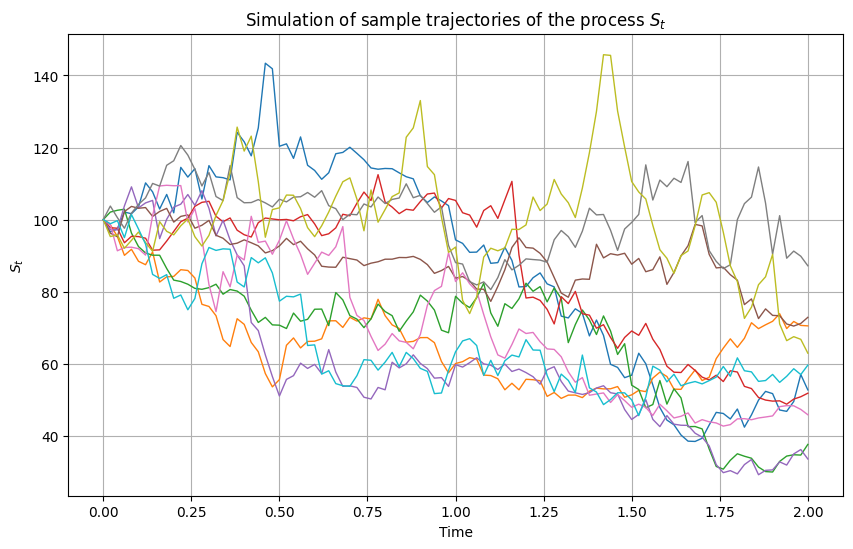

In [2]:
# Simulation parameters
T = 2.0           # Total time
n = 100           # Number of time steps
dt = T / n        # Time step size
m = 1000          # Number of trajectories to simulate

# Parameters for the S_t process
S0 = 100          # Initial asset price
sigma0 = 0.2      # Initial volatility
lambda_ = 2.0     # Mean reversion rate
c = 0.4           # Long-term mean level
gamma = 0.3       # Volatility of the process

t = np.linspace(0, T, n + 1)

S = np.zeros((m, n + 1))       # Asset price trajectories
sigma = np.zeros((m, n + 1))   # Volatility trajectories
S[:, 0] = S0
sigma[:, 0] = sigma0

for i in range(1, n + 1):
    dW1 = np.sqrt(dt) * np.random.randn(m)  # Brownian increments for S_t
    dW2 = np.sqrt(dt) * np.random.randn(m)  # Brownian increments for sigma_t

    # Update sigma_t using the Ornstein-Uhlenbeck process
    sigma[:, i] = sigma[:, i - 1] + lambda_ * (c - sigma[:, i - 1]) * dt + gamma * dW2

    # Update S_t using the discretized formula
    S[:, i] = S[:, i - 1] * np.exp(-0.5 * sigma[:, i - 1]**2 * dt + sigma[:, i - 1] * dW1)

plt.figure(figsize=(10, 6))
for j in range(10):  # Display the first 10 trajectories
    plt.plot(t, S[j], lw=1)
plt.title('Simulation of sample trajectories of the process $S_t$')
plt.xlabel('Time')
plt.ylabel('$S_t$')
plt.grid(True)
plt.show()


The simulated trajectories of the process $S_t$ show significant variability in the evolution of the risky asset's price. All trajectories start near the initial value $S_0 = 100$, but they quickly diverge due to stochastic volatility. As time progresses, the dispersion increases, with some trajectories reaching values above 140, while others fall below 40. This dispersion is driven by the volatility component $\sigma_t$, which itself follows an Ornstein-Uhlenbeck stochastic process, amplifying or dampening the fluctuations of $S_t$ randomly. The trajectories of $S_t$ thus reflect the behavior of a risky asset with variable volatility, resulting in increasing dispersion around the initial value over time.


# 3. Profit and Loss Simulation

To simulate the random variable $\text{PL}_T(\Sigma)$, we use the formula:

$$
\text{PL}_T(\Sigma) = \frac{1}{2} \int_0^T e^{r(T - u)} (\Sigma^2 - \sigma_u^2) S_u^2 \Gamma^{\text{BS}}(u, S_u, \Sigma) \, du,
$$

where $\Gamma^{\text{BS}}$ is the gamma of the option in the Black-Scholes model. $\Gamma^{\text{BS}}$ is expressed as:

$$
\Gamma^{\text{BS}}(t, S_t, \Sigma) = \frac{1}{S_t \Sigma \sqrt{T - t}} \mathcal{N}'(d^+(S_t, K, \Sigma^2 T)),
$$

where $\mathcal{N}'$ is the density of the standard normal distribution, and $d^+$ is given by:

$$
d^+ = \frac{\ln(S_t / K) + (r + 0.5 \Sigma^2)(T - t)}{\Sigma \sqrt{T - t}}.
$$

Rewriting $\Gamma^{\text{BS}}$ with this expression, we have:

$$
\Gamma^{\text{BS}}(t, S_t, \Sigma) = \frac{\exp\left(-\frac{(d^+)^2}{2}\right)}{S_t \Sigma \sqrt{2 \pi (T - t)}}.
$$

#### Numerical Approximation of $\text{PL}_T(\Sigma)$

To approximate $\text{PL}_T(\Sigma)$ numerically, we replace the integral with a discrete sum over time steps:

$$
\text{PL}_T(\Sigma) \approx \frac{1}{2} \sum_{i=0}^{n-1} e^{r(T - t_i)} (\Sigma^2 - \sigma_{t_i}^2) S_{t_i}^2 \Gamma^{\text{BS}}(t_i, S_{t_i}, \Sigma) \Delta t.
$$

This approach involves:
1. Simulating the stochastic trajectories of $S_t$ and $\sigma_t$.
2. Computing $d^+$ and $\Gamma^{\text{BS}}$ at each time step $t_i$.
3. Summing the contributions at each time step to approximate the integral.

By implementing this method, we can study the distribution of $\text{PL}_T(\Sigma)$ under different conditions, such as varying strike prices $K$, and analyze its statistical properties. The results provide insights into the efficiency and behavior of the Black-Scholes hedging strategy under stochastic volatility.


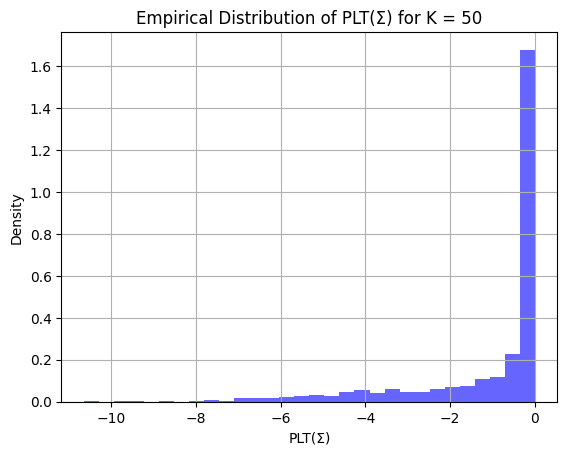

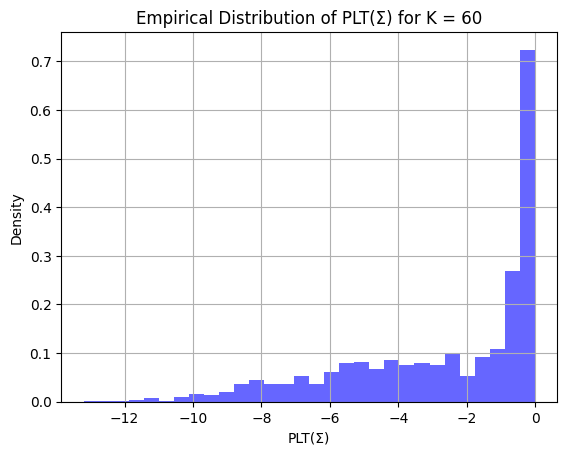

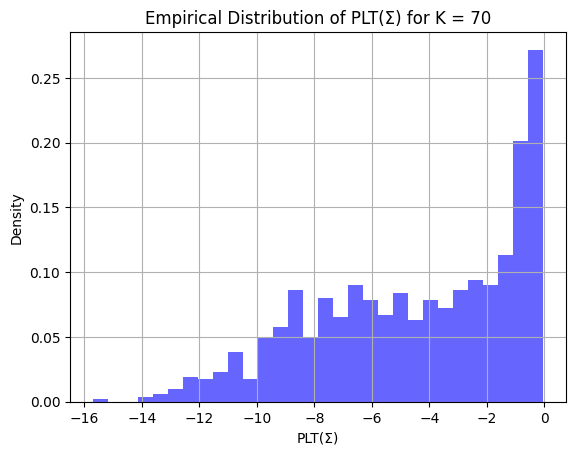

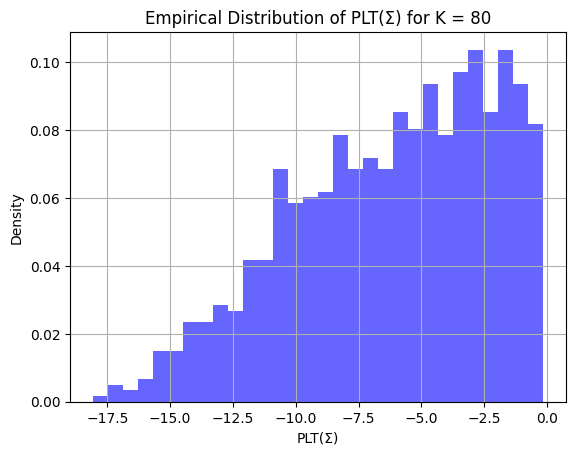

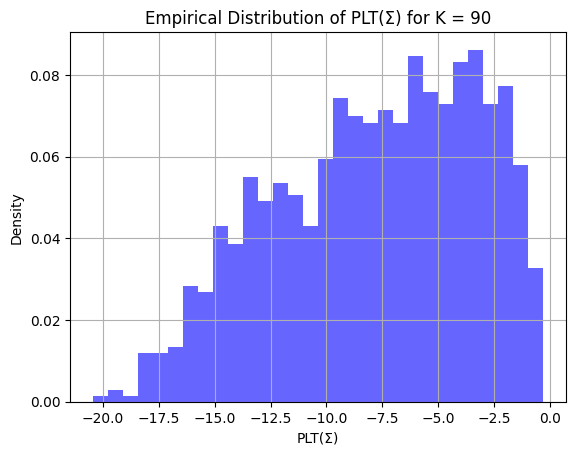

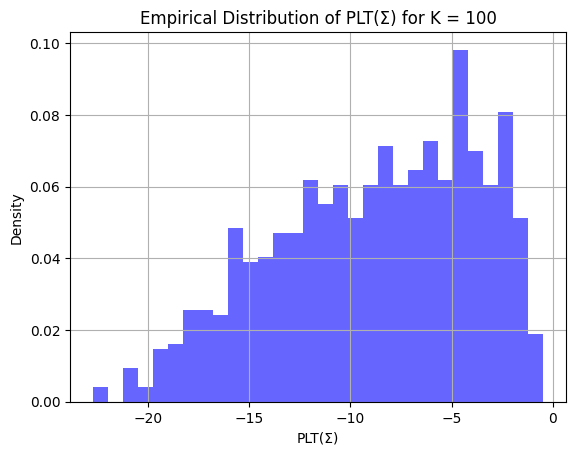

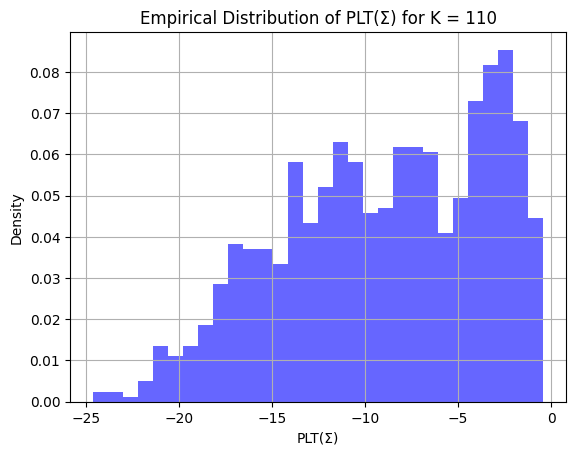

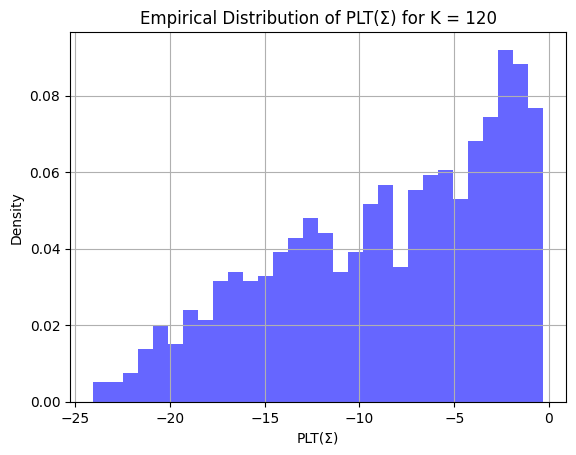

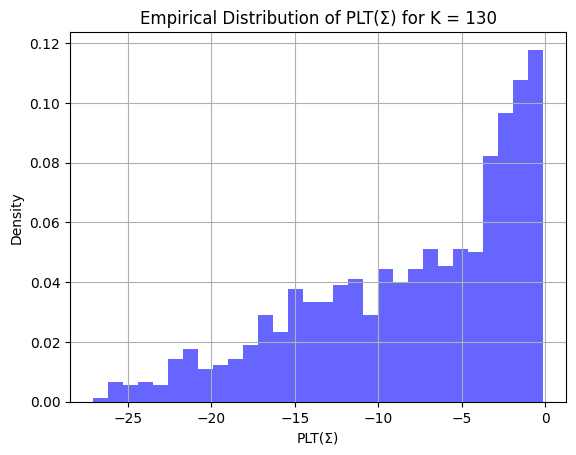

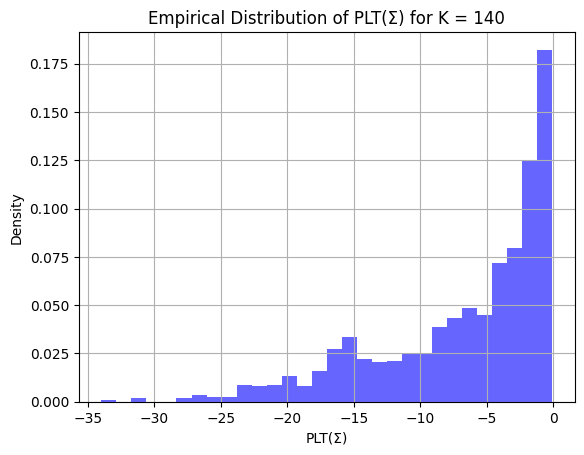

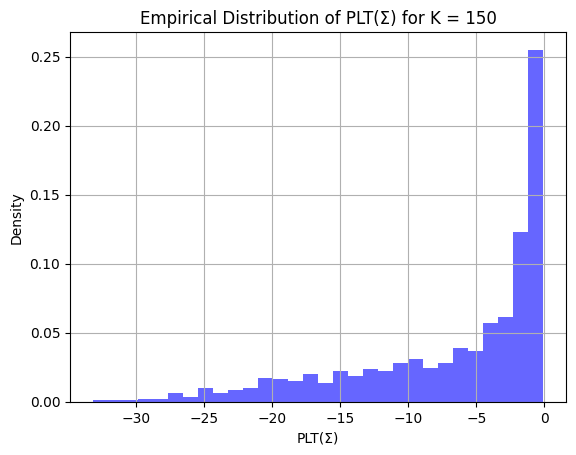

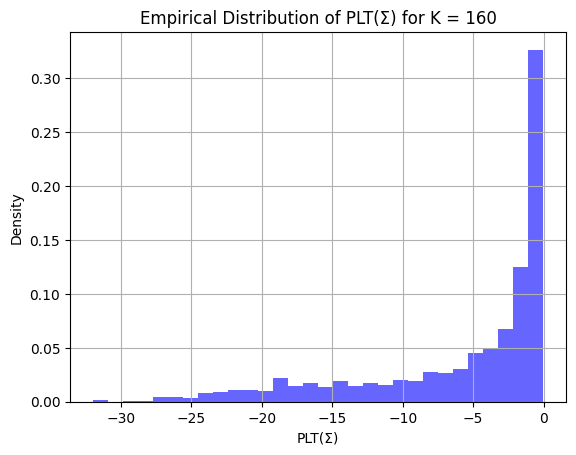

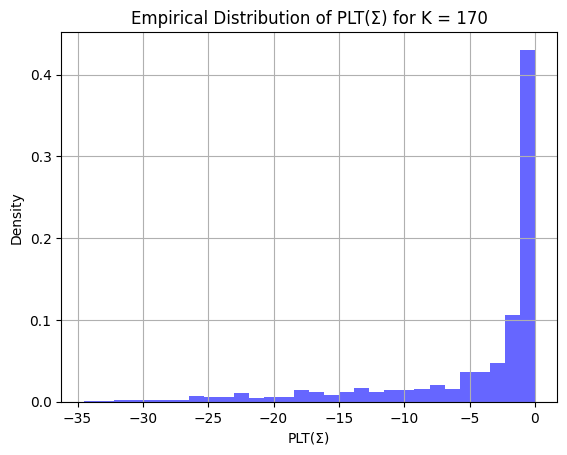

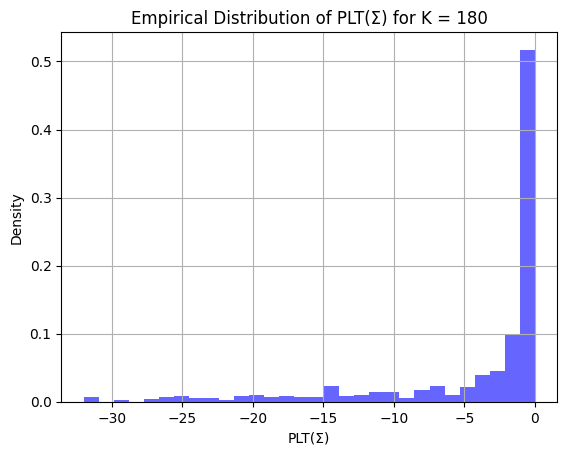

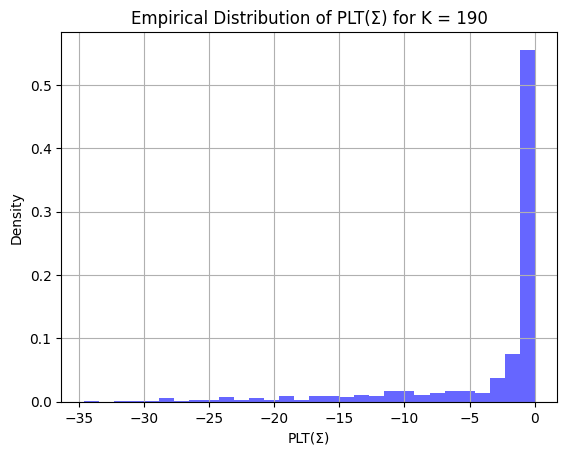

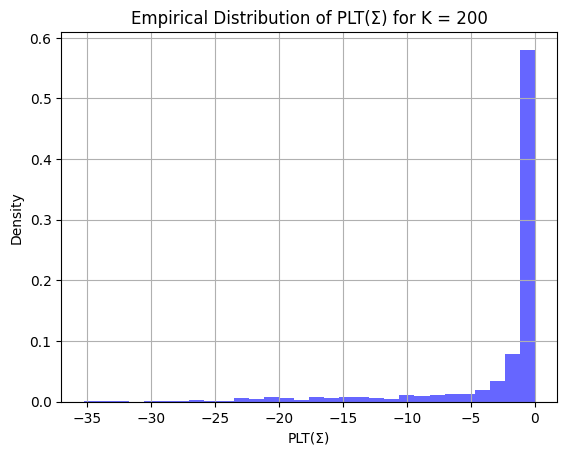

In [3]:
# Simulation parameters
S0 = 100             # Initial asset price
T = 2                # Total time
sigma0 = 0.2         # Initial volatility
lambda_ = 2.0        # Mean reversion rate
c = 0.4              # Long-term mean of the volatility
gamma = 0.3          # Volatility of the process
r = 0.02             # Risk-free rate
m = 1000             # Number of trajectories
n = 100              # Number of time steps
dt = T / n           # Time step size

K_values = np.arange(50, 201, 2)  # Range of strike prices

# Function to calculate d_plus
def d_plus(S, K, T, sigma, r, t):
    return (np.log(S / K) + (r + 0.5 * sigma**2) * (T - t)) / (sigma * np.sqrt(T - t))

# Function to calculate the Black-Scholes gamma
def gamma_bs(S, K, T, sigma, r, t):
    d1 = d_plus(S, K, T, sigma, r, t)
    return np.exp(-d1**2 / 2) / (S * sigma * np.sqrt(2 * np.pi * (T - t)))

mean_PLT = []  # List to store mean of PLT for each strike price
var_PLT = []   # List to store variance of PLT for each strike price

# Loop over strike prices
for K in K_values:
    PLT = []  # List to store PLT values for this strike price
    for _ in range(m):
        S = S0
        sigma = sigma0
        integral = 0.0

        # Loop over time steps
        for i in range(n):
            dW1 = np.sqrt(dt) * np.random.randn()  # Brownian increment for S
            dW2 = np.sqrt(dt) * np.random.randn()  # Brownian increment for sigma
            sigma = sigma + lambda_ * (c - sigma) * dt + gamma * dW2
            S = S * np.exp(-0.5 * sigma**2 * dt + sigma * dW1)

            gamma = gamma_bs(S, K, T, sigma0, r, i * dt)
            integral += np.exp(r * (T - i * dt)) * (sigma0**2 - sigma**2) * S**2 * gamma * dt

        PLT.append(0.5 * integral)  # Compute and store PLT for this trajectory

    mean_PLT.append(np.mean(PLT))  # Compute mean of PLT for this strike price
    var_PLT.append(np.var(PLT))    # Compute variance of PLT for this strike price

    # Plot histogram for every 10th strike price
    if K % 10 == 0:
        plt.figure()
        plt.hist(PLT, bins=30, density=True, alpha=0.6, color='b')
        plt.title(f'Empirical Distribution of PLT(Σ) for K = {K}')
        plt.xlabel('PLT(Σ)')
        plt.ylabel('Density')
        plt.grid(True)
        plt.show()


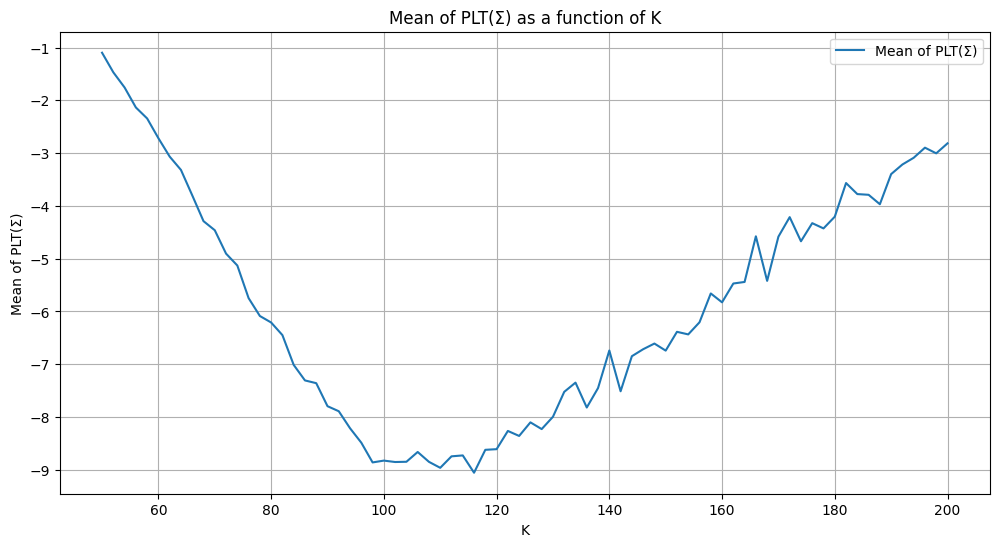

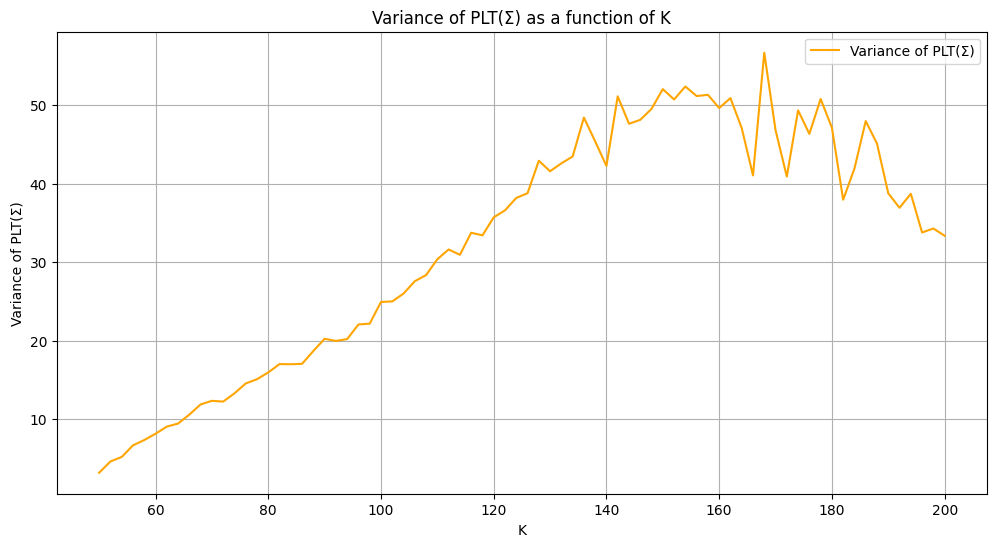

In [4]:
# Plot the mean of PLT(Σ) as a function of K
plt.figure(figsize=(12, 6))
plt.plot(K_values, mean_PLT, label='Mean of PLT(Σ)')
plt.xlabel('K')
plt.ylabel('Mean of PLT(Σ)')
plt.title('Mean of PLT(Σ) as a function of K')
plt.grid(True)
plt.legend()
plt.show()

# Plot the variance of PLT(Σ) as a function of K
plt.figure(figsize=(12, 6))
plt.plot(K_values, var_PLT, label='Variance of PLT(Σ)', color='orange')
plt.xlabel('K')
plt.ylabel('Variance of PLT(Σ)')
plt.title('Variance of PLT(Σ) as a function of K')
plt.grid(True)
plt.legend()
plt.show()


The curves of the **mean and variance of $\text{PL}_T(\Sigma)$ as a function of $K$** reveal interesting trends. The mean of $\text{PL}_T(\Sigma)$ decreases up to a certain value of $K$, then begins to increase gradually for higher values. This behavior can be interpreted as an indication that the hedging strategy tends to generate larger losses for slightly in-the-money options (around the minimum mean value). However, for very high values of $K$, the mean increases again, potentially reflecting reduced hedging efficiency for deep in-the-money options, where the impact of stochastic volatility becomes less predictable.

The variance of $\text{PL}_T(\Sigma)$, on the other hand, increases sharply up to a certain value of $K$, beyond which it begins to decrease slowly. This initial increase in variance reflects the growing risk associated with hedging losses for increasingly in-the-money options, but beyond a certain threshold of $K$, this risk appears to stabilize and even slightly decrease. This can be explained by the fact that, for very high values of $K$, the asset price trajectories tend to stabilize relative to the strike price, reducing the variability of hedging outcomes.

The **histograms of the empirical distributions of $\text{PL}_T(\Sigma)$** also show a distinct evolution as $K$ changes. For low values of $K$, the distribution is skewed, with a concentration of values near zero and a moderately extending tail towards losses. As $K$ increases, the distribution gradually spreads out, reflecting an increase in the dispersion of outcomes. For very high values of $K$, the distribution becomes highly asymmetric again, with a much longer tail towards significant losses, indicating increased risk for these high strike prices.

In summary, this evolution of the histograms highlights that Black-Scholes hedging with constant volatility is particularly inefficient in a stochastic volatility framework, especially for deep in-the-money options, where large losses become more probable.


# 4. Conclusion

The analysis of $\text{PL}_T(\Sigma)$ in a stochastic volatility framework reveals key insights into the limitations of the Black-Scholes hedging strategy:

1. **Impact of Stochastic Volatility**: The deviation from constant volatility assumed in the Black-Scholes model introduces significant variability in hedging outcomes. The stochastic nature of volatility amplifies or dampens price fluctuations unpredictably, leading to inefficiencies in the hedging process.

2. **Behavior Across Strike Prices**: Both the mean and variance of $\text{PL}_T(\Sigma)$ exhibit non-linear behavior as a function of $K$. For slightly in-the-money options, the strategy generates larger average losses, while deep in-the-money options experience an increase in tail risk, as reflected by the distribution asymmetry and extended loss tails.

3. **Distribution Dynamics**: The shape of the empirical distributions evolves with $K$, moving from concentrated and skewed for low strike prices to more dispersed for intermediate values, and finally becoming highly asymmetric for high strike prices. This highlights the increased unpredictability of hedging outcomes in extreme scenarios.

4. **Limitations of Black-Scholes Hedging**: The inefficiencies observed underscore the limitations of using a constant volatility assumption for hedging in a stochastic volatility environment. The model fails to account for the dynamic and mean-reverting nature of volatility, which significantly impacts hedging performance, particularly for in-the-money options.

This study emphasizes the need for more robust models that incorporate stochastic volatility to improve hedging accuracy and manage the risks associated with large deviations from constant volatility assumptions. Future work could focus on alternative hedging strategies, such as those derived from stochastic volatility models or using volatility-adjusted deltas, to mitigate these inefficiencies.
